This notebook executes a simple preprocessing pipeline and visualizes event response with time

In [ ]:
import mne
from mne.preprocessing import ICA
from autoreject import get_rejection_threshold, compute_thresholds, AutoReject
import os
import numpy as np 
import argparse

LOW_FREQ = 0.5
HI_FREQ = 125
input_file = "subj04_session1_eeg.fif"

# parser = argparse.ArgumentParser(description='Preprocess EEG data')
# parser.add_argument('input_file', type=str, help='Input file name', default='subj04_session2_eeg.fif')
# args = parser.parse_args()

# Load the BDF file
fif_file_path = os.path.join('eeg_data', 'fif', input_file) 
raw = mne.io.read_raw_fif(fif_file_path, preload=True)

# Apply standard montage
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)

# Filter data (Step 9)
raw.filter(l_freq=LOW_FREQ, h_freq=HI_FREQ)
raw.notch_filter(freqs=60)

# ICA for artifact correction (Steps 14 and 15)
# As is typically done with ICA, the data are first scaled to unit variance and whitened using principal components analysis (PCA)
# before performing the ICA decomposition. It uses the # of components needed to explain 95% of the variance
ica = ICA(n_components=0.95, random_state=97)
ica.fit(raw)
ica.exclude = [1]
ica.apply(raw)

In [20]:
# Channels: PO3, PO4, PO7, PO8, POz, O1, O2, Oz
ch_names = raw.info['ch_names']
occipital_picks = mne.pick_channels_regexp(ch_names, "(PO[3478z]|O[12z])")

In [21]:
events = mne.find_events(raw)
epochs = mne.Epochs(raw, events, picks=occipital_picks, event_id=None, tmin=-0.05, tmax=0.60, preload=True)

3752 events found on stim channel Status
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234

In [22]:
#TODO: do we add autoreject before plotting

n_interpolates = np.array([1, 4, 32])
consensus_percs = np.linspace(0, 1.0, 11)
# ar = AutoReject(n_interpolates, consensus_percs, picks=np.array(occipital_picks), thresh_method='random_search', random_state=42)
# epochs = ar.fit_transform(epochs)

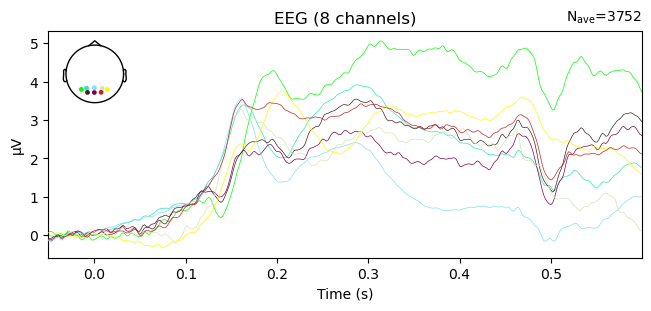

In [26]:
res = epochs.average().plot()
